In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise all the columns in the df
pd.pandas.set_option('display.max_columns', None)

# Importing Libraries
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r'C:\Users\Poojan Mahajan\Downloads\listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20210707180351,2021-07-08,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within a day,100%,40%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Iron"", ""Wifi"", ""Fire extinguisher"", ""Hair dr...",$50.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,7,37,217,2021-07-08,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.92,4.66,4.82,NaN,f,3,0,3,0,1.88
1,85148,https://www.airbnb.com/rooms/85148,20210707180351,2021-07-08,Habitación en Dublín Double room,<b>The space</b><br />I'm renting a double roo...,NaN,https://a0.muscache.com/pictures/583752/61c664...,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,NaN,South Dublin,NaN,53.29885,-6.31850,Private room in house,Private room,2,NaN,NaN,1.0,1.0,"[""Essentials"", ""Heating"", ""Breakfast"", ""Cable ...",$30.00,1,5,1,1,5,5,1.0,5.0,NaN,t,0,0,9,284,2021-07-08,1,0,0,2019-05-11,2019-05-11,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.04
2,85156,https://www.airbnb.com/rooms/85156,20210707180351,2021-07-08,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within a day,100%,40%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29209,-6.25624,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Iron"", ""Wifi"", ""Fire extinguisher"", ""Hair dr...",$63.00,3,14,3,3,14,14,3.0,14.0,NaN,t,0,7,37,312,2021-07-08,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.88,4.66,4.80,NaN,f,3,0,3,0,2.26
3,159889,https://www.airbnb.com/r

In [3]:
review_variables = [feature for feature in df if 'reviews' in feature or 'review' in feature]
review_variables

['number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [4]:
dataset = df[review_variables]

In [5]:
dataset.describe()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7740.000000,7740.000000,7740.000000,5843.000000,5674.000000,5675.000000,5668.000000,5674.000000,5668.000000,5666.000000,5843.000000
mean,28.888760,1.286693,0.138243,4.549230,4.781124,4.646682,4.831069,4.849166,4.731501,4.622141,0.971693
std,57.535509,5.397099,1.148946,0.891578,0.417249,0.546327,0.374478,0.347108,0.360798,0.449906,1.757265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000
25%,1.000000,0.000000,0.000000,4.530000,4.750000,4.540000,4.810000,4.830000,4.630000,4.500000,0.110000
50%,5.000000,0.000000,0.000000,4.800000,4.900000,4.830000,4.950000,4.970000,4.820000,4.720000,0.410000
75%,27.000000,0.000000,0.000000,4.990000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,1.260000
max,605.000000,142.000000,82.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,82.000000


In [6]:
data = pd.concat([df[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_rating']].reset_index(drop=True)])

In [7]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data['review_scores_rating'],test_size=0.1,random_state=0)

In [8]:
X_train.shape, X_test.shape

((6966, 5), (774, 5))

mean_value=y_train.mean()
y_train.fillna(mean_value,inplace=True)
    
y_train.isnull().sum() 

In [9]:
X_train.describe()

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating
count,5116.000000,5109.000000,5115.000000,5109.000000,5273.000000
mean,4.642207,4.828156,4.847595,4.732257,4.541811
std,0.555746,0.383751,0.356745,0.363324,0.905196
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.530000,4.810000,4.830000,4.640000,4.520000
50%,4.820000,4.950000,4.970000,4.820000,4.800000
75%,5.000000,5.000000,5.000000,5.000000,4.990000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1]

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

review_scores_cleanliness: 0.2668% missing value
review_scores_checkin: 0.2677% missing value
review_scores_communication: 0.2669% missing value
review_scores_location: 0.2677% missing value
review_scores_rating: 0.2451% missing value


In [11]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    mean_value=data[feature].mean()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(mean_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()    

review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
dtype: int64

In [12]:
## Capture the dependent feature
y_train=data[['review_scores_rating']]

## drop dependent feature from dataset
X_train=data.drop(['review_scores_rating'],axis=1)

In [13]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.006, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


feature_sel_model.get_support()

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

selected_feat

X_train=X_train[selected_feat]

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review_scores_cleanliness       7740 non-null   float64
 1   review_scores_checkin           7740 non-null   float64
 2   review_scores_communication     7740 non-null   float64
 3   review_scores_location          7740 non-null   float64
 4   review_scores_cleanlinessnan    7740 non-null   int32  
 5   review_scores_checkinnan        7740 non-null   int32  
 6   review_scores_communicationnan  7740 non-null   int32  
 7   review_scores_locationnan       7740 non-null   int32  
 8   review_scores_ratingnan         7740 non-null   int32  
dtypes: float64(4), int32(5)
memory usage: 393.2 KB


In [15]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_scores_rating  7740 non-null   float64
dtypes: float64(1)
memory usage: 60.6 KB


In [16]:
data.to_csv('airbnb.csv',index=False)

In [17]:
# Split-out validation df
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,y_train , test_size=0.20, random_state=1, shuffle=True)

In [18]:
X_train.shape, Y_train.shape

((6192, 9), (6192, 1))

In [22]:
Y_train.isnull().sum()

review_scores_rating    0
dtype: int64

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

ValueError: Dimensions of labels and X must be compatible

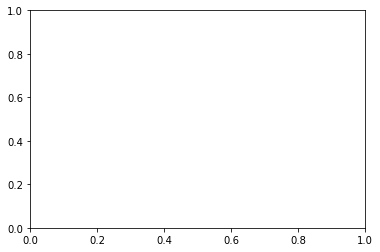

In [23]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))